## Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

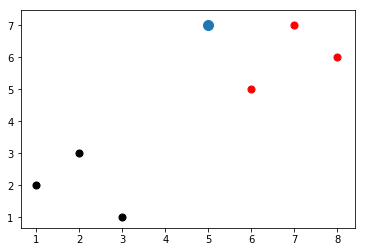

In [3]:
[[plt.scatter(ii[0],ii[1], s= 50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)

In [48]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):

    #if len(data) >= k:
        #warnings.warn("K es un valor menor que el numero total de elementos a votar !!")
        
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feactue[0]-predict[0])**2 + (feacture[1]-predict(1))**2) # Distancia euclidea punto a punto
            #d = nq.sqrt(np.sum((np.array(feature) - np.array(predict))**2)) # Distancia euclidea, np permite la operacion de todo el dataset
            d = np.linalg.norm(np.array(feature) - np.array(predict)) # Numpy ya tiene esta operacion en su core y es lo mas rapido 
            distances.append([d,group])
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]# sorted: ordena por la primera columna, como la primera columa es la distancia se ordena
                                                #K nos da los primeros 3 datos y obtenemos losla columna 1 que tiene la categoria
    if verbose:
        print (votes)
    
    vote_result = Counter(votes).most_common(1)# [('r',2), ('k',1)]
    if verbose:
        print(vote_result)
    
    return vote_result[0][0]


In [49]:
result = k_nearest_neighbors(dataset, new_point,3,True)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

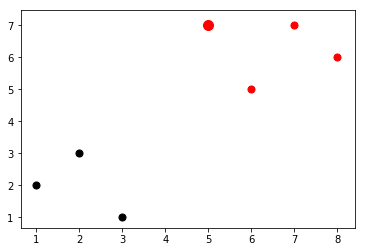

In [50]:
[[plt.scatter(ii[0],ii[1], s= 50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)

[[3.905124837953327, 'k'], [2.5, 'k'], [3.640054944640259, 'k'], [2.0615528128088303, 'r'], [3.905124837953327, 'r'], [4.272001872658765, 'r']]
['r', 'k', 'k']
[('k', 2)]


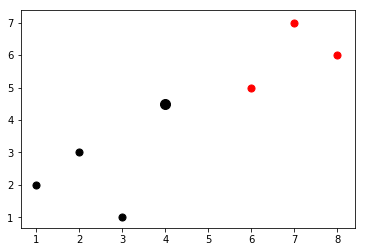

In [53]:
new_point =  [4,4.5]
result = k_nearest_neighbors(dataset, new_point,3,True)
[[plt.scatter(ii[0],ii[1], s= 50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)

[[5.0990195135927845, 'k'], [4.47213595499958, 'k'], [3.0, 'k'], [4.0, 'r'], [6.082762530298219, 'r'], [5.385164807134504, 'r']]
['k', 'r', 'k']
[('k', 2)]


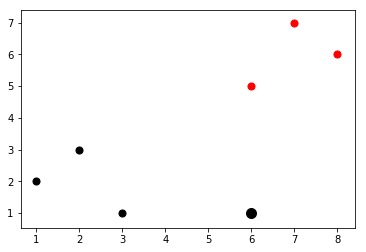

In [54]:
new_point =  [6,1]
result = k_nearest_neighbors(dataset, new_point,3,True)
[[plt.scatter(ii[0],ii[1], s= 50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)

## Aplicando nuestro KNN al Datset del Cancer

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.replace("?", -9999, inplace=True)
df.columns = ["name","V1","V2","V3","V4","V5","V6","V7","V8","V9","class"]
df = df.drop(["name"],1)

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
full_data = df.astype(float).values.tolist()

In [56]:
full_data[:5]

[[5.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [10.0, 4.0, 3.0, 10.0, 3.0, 10.0, 7.0, 1.0, 2.0, 4.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [12]:
import random

In [13]:
random.shuffle(full_data)

In [14]:
test_size = 0.2

In [15]:
train_set = {2:[],4:[]} #creamos un diccionario con dos categorias 2 y 4
test_set =  {2:[],4:[]} #creamos un diccionario con dos categorias 2 y 4

In [16]:
train_data = full_data[:-int(test_size*len(full_data))] # dividimos full data en train y test
test_data = full_data[-int(test_size*len(full_data)):]

In [57]:
for i in train_data:
    # Llenamos  los diccionario con el valor de la ultima columna y copiamos todo menos la ultima columna
    train_set[i[-1]].append(i[:-1]) 
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [59]:
print(train_set[2][:2])
print(train_set[4][:2])

[[5.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]]
[[10.0, 4.0, 3.0, 10.0, 3.0, 10.0, 7.0, 1.0, 2.0], [10.0, 4.0, 6.0, 4.0, 5.0, 10.0, 7.0, 1.0, 1.0]]


In [61]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set,data,k=5) # 5 es el valor por default en KNeighborsClassifier
        if group == vote:
            correct += 1
        total += 1
print("Eficacia del KNN", correct/total)

Eficacia del KNN 0.9640287769784173


## La diferencia entre la implementacion y el algoritmo de sklearn es la eficiencia y optimizacion 